### Import the relevant libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load the data

In [3]:
card_fit_data = pd.read_csv('CardioGoodFitness.csv')

In [4]:
card_fit_data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [5]:
card_fit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [6]:
card_fit_data.shape

(180, 9)

# Clean the data

In [8]:
card_fit_data.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [9]:
card_fit_data.duplicated().sum()

0

###### <b>There are neither null nor dublicated values</b>

In [10]:
# Let's check the unique values of each column.
# Columns like Gender, Marital Status, Usage and Fitness must have certain values.

for i in card_fit_data.columns:
    print('{}: {}'.format(i.upper(), card_fit_data[i].unique()))

PRODUCT: ['TM195' 'TM498' 'TM798']
AGE: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42]
GENDER: ['Male' 'Female']
EDUCATION: [14 15 12 13 16 18 20 21]
MARITALSTATUS: ['Single' 'Partnered']
USAGE: [3 2 4 5 6 7]
FITNESS: [4 3 2 1 5]
INCOME: [ 29562  31836  30699  32973  35247  37521  36384  38658  40932  34110
  39795  42069  44343  45480  46617  48891  53439  43206  52302  51165
  50028  54576  68220  55713  60261  67083  56850  59124  61398  57987
  64809  47754  65220  62535  48658  54781  48556  58516  53536  61006
  57271  52291  49801  62251  64741  70966  75946  74701  69721  83416
  88396  90886  92131  77191  52290  85906 103336  99601  89641  95866
 104581  95508]
MILES: [112  75  66  85  47 141 103  94 113  38 188  56 132 169  64  53 106  95
 212  42 127  74 170  21 120 200 140 100  80 160 180 240 150 300 280 260
 360]


###### <b>Our data are already clean and I will examine our customers' profiles regarding with their purchases of our 3 products.</b>

# Examine the data

In [12]:
card_fit_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


#### <b>Observations:</b>
<ul><li>The average age of our customers is 29 years old</li>
<li>The education in years is between 12 and 21 years</li>
<li>They usually use our products 3 times a week</li>
<li>The average self-rated fitness is 3</li>
<li>Their average income is $53719</li>
<li>Our customers run/walk on an average of 103 miles</li></ul>

In [13]:
card_fit_data['Product'].value_counts()

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64

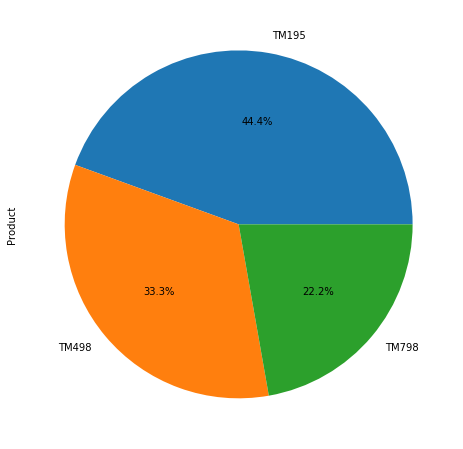

In [18]:

card_fit_data['Product'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(8,8))
plt.show()

###### <b>Our customers prefer buying the TM195 model, then the TM498 model and finally the TM798 model</b>

In [14]:
card_fit_data.MaritalStatus.value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

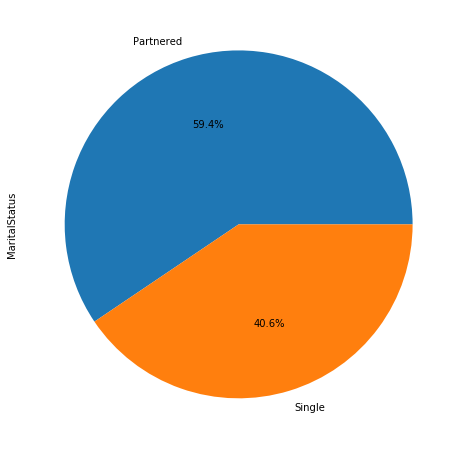

In [20]:
card_fit_data.MaritalStatus.value_counts().plot.pie(autopct='%1.1f%%',figsize=(8,8))
plt.show()

###### <b>There are 107 partnered customers and 73 dingle ones.</b>

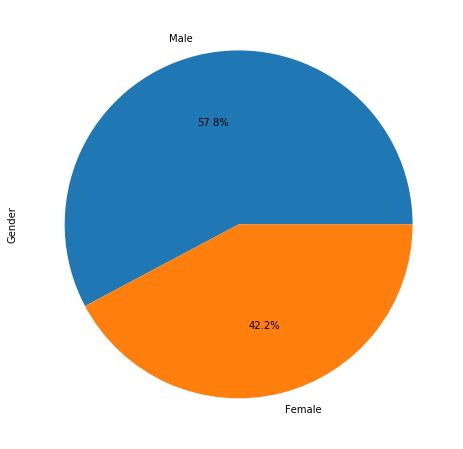

In [157]:
card_fit_data.Gender.value_counts().plot.pie(autopct='%1.1f%%',figsize=(8,8))
plt.show()

### Univariate analysis

In [42]:
def univariate_analysis(data):  
    Name=data.name.upper()
    fig, axes =plt.subplots(1,2,figsize=(20,7))
    fig.suptitle("UNIVARIATE ANALYSIS OF "+ Name  , fontsize=18, fontweight='bold')
    sns.distplot(data,kde=False,color='Blue',ax=axes[0])
    axes[0].axvline(data.mean(), color='y', linestyle='--',linewidth=2)
    axes[0].axvline(data.median(), color='r', linestyle='dashed', linewidth=2)
    axes[0].axvline(data.mode()[0],color='g',linestyle='solid',linewidth=2)
    axes[0].legend({'Mean':data.mean(),'Median':data.median(),'Mode':data.mode()})
    sns.boxplot(x=data,showmeans=True, orient='h',color="purple",ax=axes[1])
    

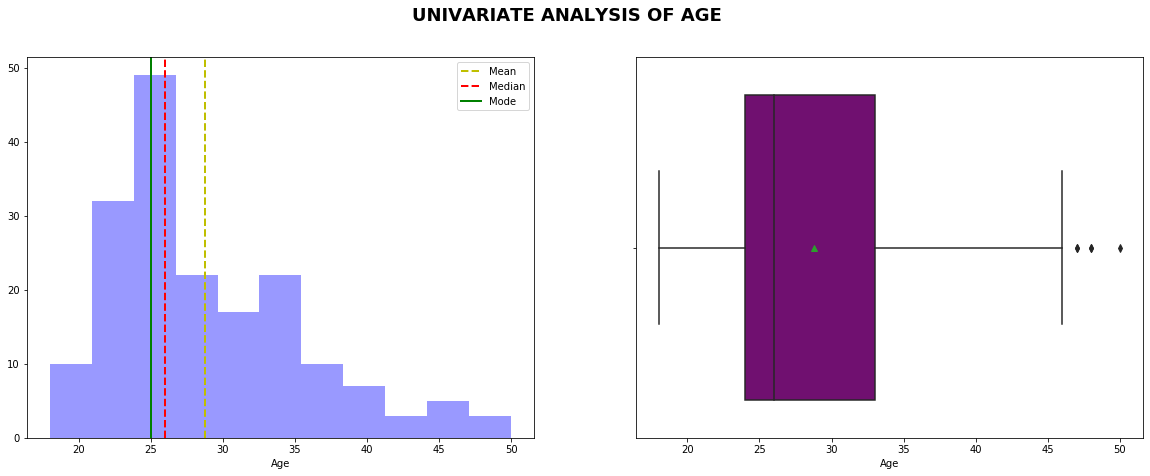

In [44]:
univariate_analysis(card_fit_data.Age)

<li>Age is right skewed</li><li>The majority of our customers is between 24 and 33 years old</li>

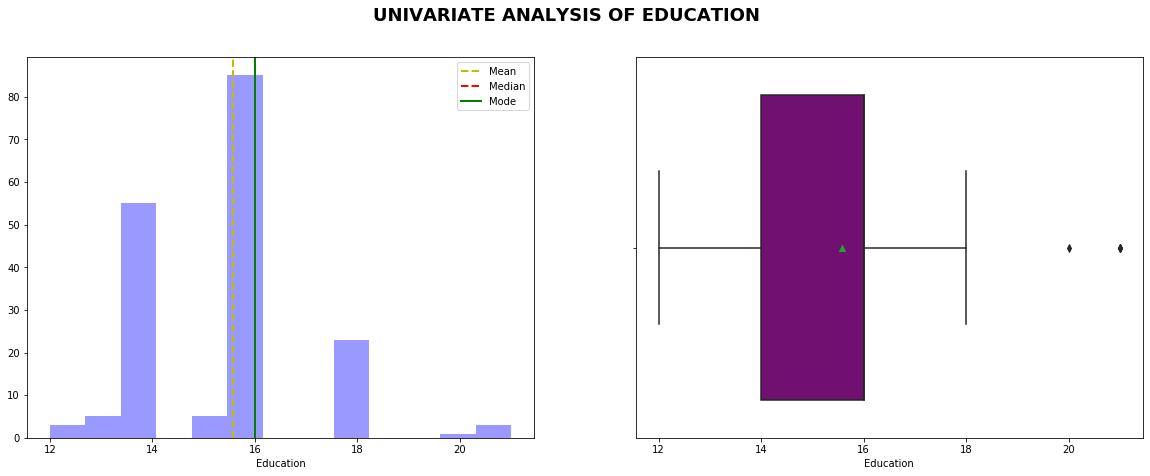

In [45]:
univariate_analysis(card_fit_data.Education)

<li>Most of our customers have between 14 and 16 years of education</li>

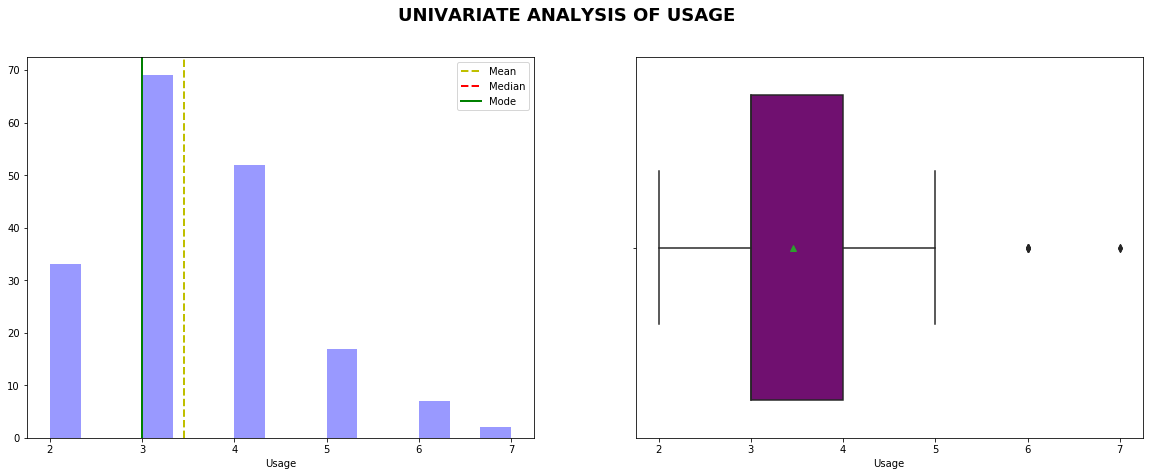

In [47]:
univariate_analysis(card_fit_data.Usage)

<li> Most of our customers run/walk 3 or 4 times per week</li>

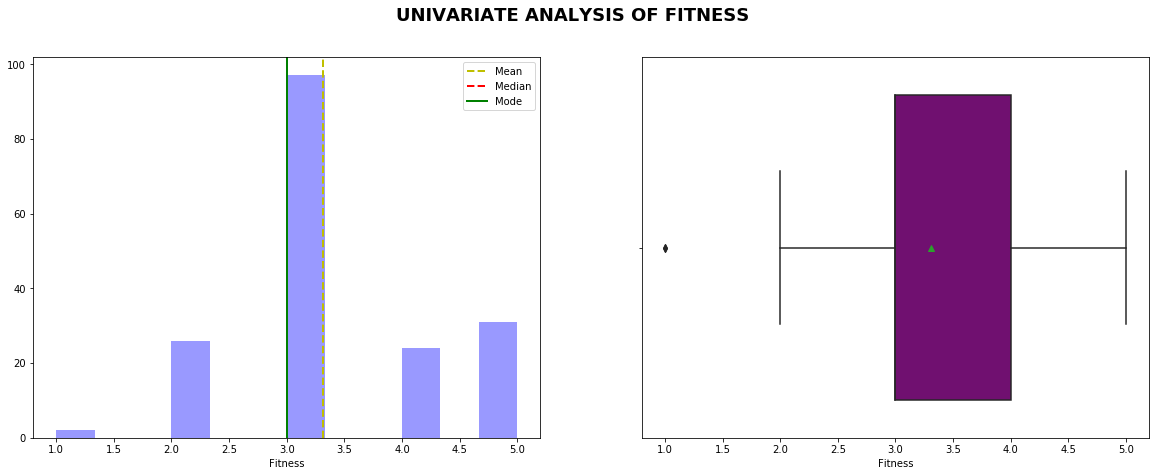

In [48]:
univariate_analysis(card_fit_data.Fitness)

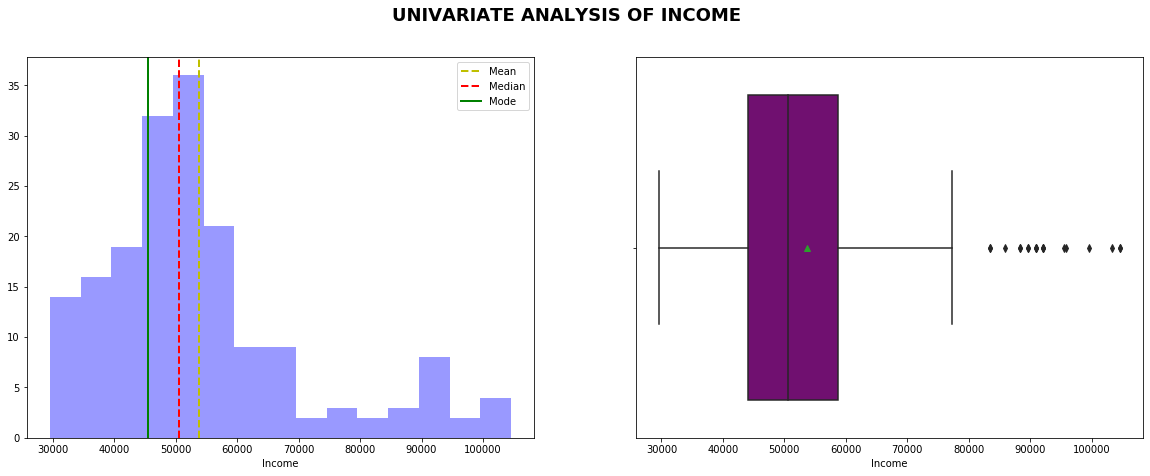

In [46]:
univariate_analysis(card_fit_data.Income)

##### <li>Income is rigth skewed</li><li>Most customers earn less than $60K</li>

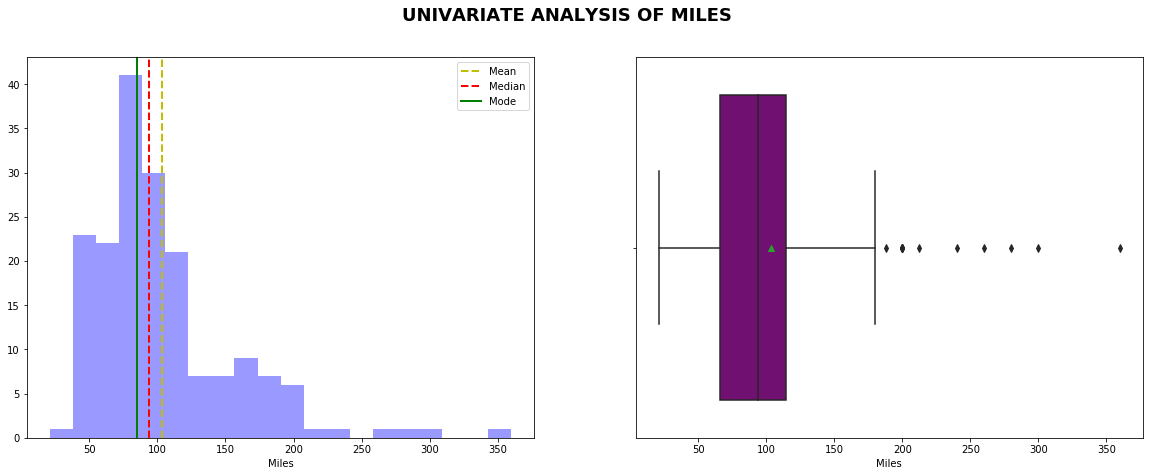

In [49]:
univariate_analysis(card_fit_data.Miles)

<li>The majority of our customers run/walk near the overall average of miles which is 103</li>
<li>There are some outliers, who run/walk more than 200 miles</li>

### Bivariate Analysis

Gender   Female  Male
Product              
TM195        40    40
TM498        29    31
TM798         7    33


Text(0.5, 1.0, 'Product by Gender')

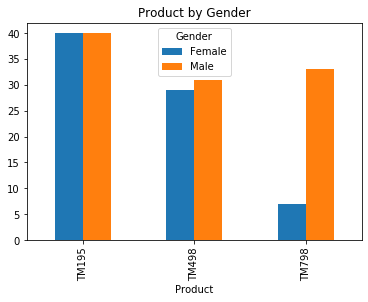

In [52]:
gender_product = pd.crosstab(card_fit_data['Product'],card_fit_data['Gender'])
print(gender_product.head())
gender_product.plot(kind='bar')
plt.title('Product by Gender')

###### <b>TM498 and TM4798 are more preferred by men than women.</b>

Education  12  13  14  15  16  18  20  21
Product                                  
TM195       2   3  30   4  39   2   0   0
TM498       1   2  23   1  31   2   0   0
TM798       0   0   2   0  15  19   1   3


Text(0.5, 1.0, 'Product by Education')

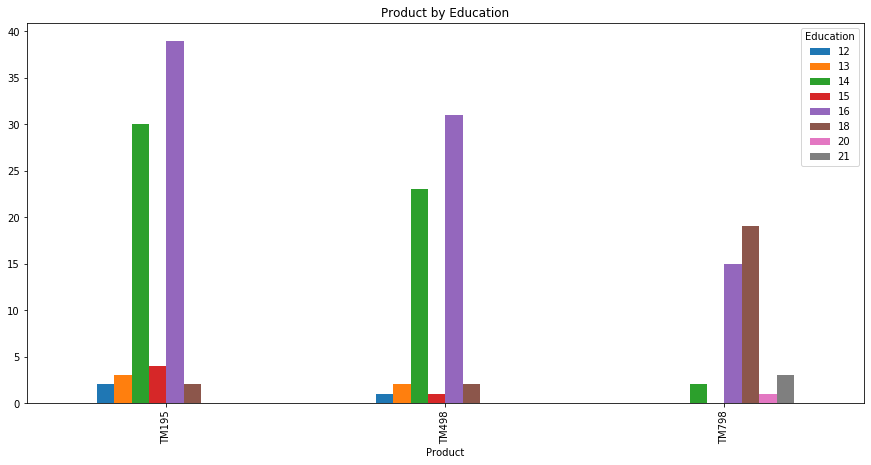

In [90]:
education_product = pd.crosstab(card_fit_data['Product'],card_fit_data['Education'])
print(education_product)
education_product.plot(kind='bar',figsize=(15,7))
plt.title('Product by Education')

###### <b>Customers with 14 and 16 years of education tend to buy TM195 and TM498, while customers with 16 and 18 years of education prefer the TM798 model. </b>

MaritalStatus  Partnered  Single
Product                         
TM195                 48      32
TM498                 36      24
TM798                 23      17


Text(0.5, 1.0, 'Marital Status by Product')

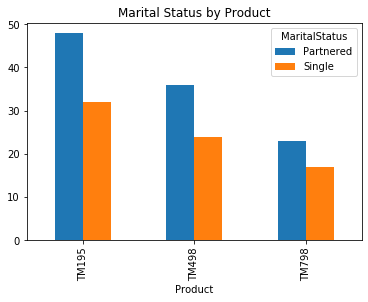

In [55]:
marital_product = pd.crosstab(card_fit_data['Product'],card_fit_data['MaritalStatus'])
print(marital_product)
marital_product.plot(kind='bar')
plt.title('Marital Status by Product')

###### <b>Partnered customers tend to buy our models.</b>

Fitness  1   2   3  4   5
Product                  
TM195    1  14  54  9   2
TM498    1  12  39  8   0
TM798    0   0   4  7  29


Text(0.5, 1.0, 'Fitness by Product')

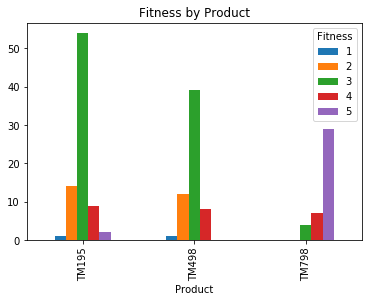

In [56]:
fitness_product = pd.crosstab(card_fit_data['Product'],card_fit_data['Fitness'])
print(fitness_product)
fitness_product.plot(kind='bar')
plt.title('Fitness by Product')

###### <b>Customers with a medium (3) self-rated shape prefer the TM195 and TM498 models, while customers with an excellent (5) self-rated shape prefer the TM798 model.</b>

Text(0.5, 1.0, 'Income by Product')

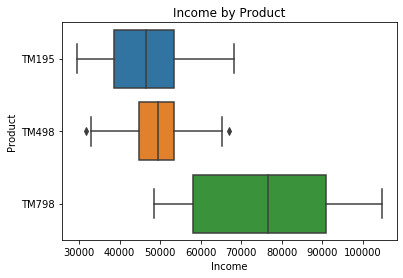

In [60]:
sns.boxplot(card_fit_data['Income'],card_fit_data['Product'])
plt.title('Income by Product')

###### <b>Customers with low income prefer the TM195 and TM498 models, while customers with higher income prefer the TM798 model.</b>

Usage     2   3   4   5  6  7
Product                      
TM195    19  37  22   2  0  0
TM498    14  31  12   3  0  0
TM798     0   1  18  12  7  2


Text(0.5, 1.0, 'Usage by Product')

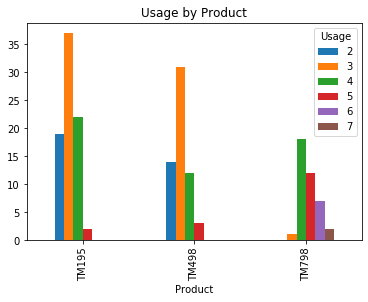

In [61]:
usage_product = pd.crosstab(card_fit_data['Product'], card_fit_data['Usage'])
print(usage_product)
usage_product.plot(kind='bar')
plt.title('Usage by Product')

###### <b>Customers who bought the TM195 and TM498 models prefer to run/walk 3 times per week, while customers who bought the TM798 model prefer to run/walk 4 or 5 times per week.</b>

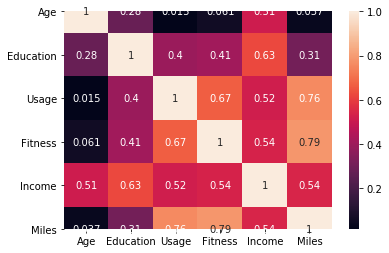

In [68]:
sns.heatmap(card_fit_data.corr(),annot=True)

In [71]:
correlated_data = card_fit_data.corr().unstack()
print(correlated_data[correlated_data>0.5])

Age        Age          1.000000
           Income       0.513414
Education  Education    1.000000
           Income       0.625827
Usage      Usage        1.000000
           Fitness      0.668606
           Income       0.519537
           Miles        0.759130
Fitness    Usage        0.668606
           Fitness      1.000000
           Income       0.535005
           Miles        0.785702
Income     Age          0.513414
           Education    0.625827
           Usage        0.519537
           Fitness      0.535005
           Income       1.000000
           Miles        0.543473
Miles      Usage        0.759130
           Fitness      0.785702
           Income       0.543473
           Miles        1.000000
dtype: float64


###### <li>There is a significant correlation between education and income.</li><li>Miles, Usage and Fitness are highly correlated (we will need this fore the miles prediction).</li>

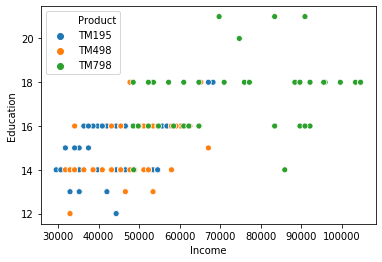

In [73]:
sns.scatterplot(card_fit_data['Income'],card_fit_data['Education'],hue=card_fit_data['Product'])

###### <b>Customers with higher income and higher education tend to buy the TM798 model.</b>

### Multivariate Analysis

MaritalStatus Partnered      Single     
Gender           Female Male Female Male
Product                                 
TM195                27   21     13   19
TM498                15   21     14   10
TM798                 4   19      3   14


Text(0.5, 1.0, 'Products by Gender and Marital Status')

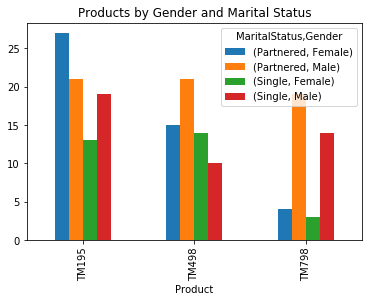

In [75]:
prod_gend_fit = pd.crosstab(card_fit_data['Product'],[card_fit_data['MaritalStatus'],card_fit_data['Gender']])
print(prod_gend_fit)
prod_gend_fit.plot(kind='bar')
plt.title('Products by Gender and Marital Status')

<li>The TM195 is mostly prefered by partnered female customers.</li>
<li>The TM498 model is mostly prefered by partnered male customers.</li>
<li>The TM798 model is mostly preferd by partnered male customers.</li>

Usage        2           3           4           5           6         7
Gender  Female Male Female Male Female Male Female Male Female Male Male
Product                                                                 
TM195       13    6     19   18      7   15      1    1      0    0    0
TM498        7    7     14   17      5    7      3    0      0    0    0
TM798        0    0      0    1      2   16      3    9      2    5    2


Text(0.5, 1.0, 'Products by Usage and Gender')

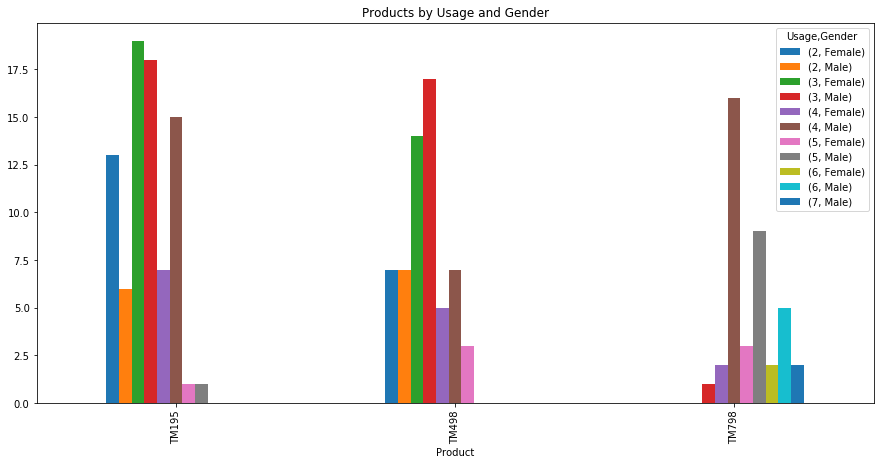

In [89]:
prod_gender_usage = pd.crosstab(card_fit_data['Product'],[card_fit_data['Usage'],card_fit_data['Gender']])
print(prod_gender_usage)
prod_gender_usage.plot(kind='bar',figsize=(15,7))
plt.title('Products by Usage and Gender')

<li>The TM195 model is mostly used by female and male customers 3 times per week and male customers 4 times per week.</li>
<li>The TM498 model is mostly used by female and male customers 3 times per week.</li>
<li>The TM798 model is mostly used by male customers 4 times per week.</li>

# Predict the miles

In [103]:
print(correlated_data[correlated_data>0.5])

Age        Age          1.000000
           Income       0.513414
Education  Education    1.000000
           Income       0.625827
Usage      Usage        1.000000
           Fitness      0.668606
           Income       0.519537
           Miles        0.759130
Fitness    Usage        0.668606
           Fitness      1.000000
           Income       0.535005
           Miles        0.785702
Income     Age          0.513414
           Education    0.625827
           Usage        0.519537
           Fitness      0.535005
           Income       1.000000
           Miles        0.543473
Miles      Usage        0.759130
           Fitness      0.785702
           Income       0.543473
           Miles        1.000000
dtype: float64


In [147]:
columns=['Usage','Fitness','Income']
X = card_fit_data[columns]
y = card_fit_data['Miles']

In [148]:
# I will standardize the independant variables (X), because their data ranges are different
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
independent_variables = scaler.transform(X)

In [149]:
# define the train and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =  train_test_split(independent_variables, y, test_size=0.3)

In [150]:
from sklearn.linear_model import LinearRegression

# create the model
linear_model = LinearRegression()

#train the model
linear_model.fit(x_train, y_train)

print(f'The intercept is {linear_model.intercept_}')
print(f'The coefficients are {linear_model.coef_}')

The intercept is 104.71696020447106
The coefficients are [21.59603016 25.23610032  3.72088266]


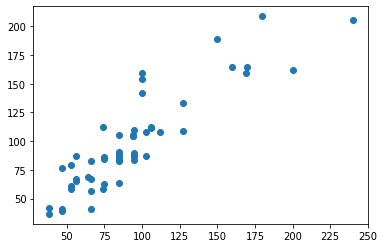

In [152]:
# test the model
predictions = linear_model.predict(x_test)

plt.scatter(y_test,predictions)

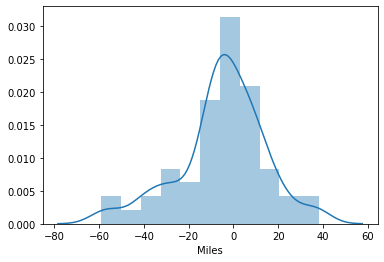

In [154]:
sns.distplot(y_test-predictions)

In [156]:
# model evaluation
from sklearn import metrics

MAE = metrics.mean_absolute_error(y_test,predictions)
MSE = metrics.mean_squared_error(y_test,predictions)
RMSE = np.sqrt(MSE)

R2 = metrics.r2_score(y_test,predictions)
adjusted_R2 = 1-((1-R2)*(180-1)/(180-3-1)) # n=180, k=3

print(f'MAE is {MAE}')
print(f'MSE is {MSE}')
print(f'RMSE is {RMSE}')
print(f'R2 is {R2}')
print(f'Adjusted R2 is {adjusted_R2}')

MAE is 14.700277963185663
MSE is 403.98561135664204
RMSE is 20.099393308173312
R2 is 0.7595214274614515
Adjusted R2 is 0.7554223608840898


##### 75.5% of the variance in the outcome variable is explained by the model (good model).

# Conclusions

### Customer profiles

<li><b>TM195</b></li>
<p>This model is the most preferable, 44.4% of our customers bought this model. The majority of our customers have low income and education between 14 and 16 years. It is equally prefered by men and women, while most of women are partnered. These customers have an average self rated fitness and use this model 3 times per week.</p>
<br>
<li><b>TM498</b></li>
<p>This model represents the 33.3% of our sales. It is mainly prefered by men who are partnered. Our customers have lower income, education between 14 and 16 years,they have an average fintness and use this model 3 times per week</p>
<br>
<li><b>TM798</b></li>
<p>This model represents the 22.2% of our sales. It is mainly prefered by men who are partnered. These customers have higher income, higher education in years, they have better fitness than the previous groups of customers. They usually walk/run more than 4 times per week.</p>

### Recomendations

<li>TM195 and TM498 have been bought by customers with lower income. We need to take this in consideration for our next marketing campaign.</li>
<li>TM798 is mainly used by customers with higher fitness levels and higher income. Moreover they use it more than 4 times per week, which means they might be athletes.</li>
<li>We need to attract more female customers. Since TM195 is equally prefered by men and women, we can use this model to attract more female customers.</li>
